In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import nibabel as nib
import os

sys.path.insert(1, '/home/quahb/caipi_denoising/src')

%load_ext autoreload
%autoreload 2

from preparation.gen_data import get_masks
from utils.data_io import load_dataset

In [ ]:
# 1. list of modalities to load for all subjects
# 2. switch statement on all types of modalities
# 3. build dict
#        {subj_id:
#           modality1: data
#           denoise_run1: (x, y)
# feed list of arrays in function
# plot(column_data1, column_data2)
# column_data = subj[modality] for subj in subj_ids

In [ ]:
# all loaded data must be scaled

In [49]:
# Load
#   epi, caipi234, reg caipi234, mask wm lesion vein
train_data = load_dataset('/home/quahb/caipi_denoising/data/datasets/training_set_pp')
test_data = load_dataset('/home/quahb/caipi_denoising/data/datasets/testing_set_pp')
# reg_test_data = load_dataset('/home/quahb/caipi_denoising/data/datasets/reg_testing_set_pp')
# mask_data = get_masks(2)

# Load
#   denoise runs
print(list(train_data.keys())[:10], list(test_data.keys())[:10])

NameError: name 'test_data' is not defined

In [249]:
masks = get_masks()

100%|███████████████████████████████████████████| 52/52 [00:19<00:00,  2.68it/s]


# QC

In [86]:
train_data.keys()

dict_keys(['1_01_016-V1_3D_T2STAR_segEPI', '1_01_017-V1_3D_T2STAR_segEPI', '1_01_018-V1_3D_T2STAR_segEPI', '1_01_020-V1_3D_T2STAR_segEPI', '1_01_021-V1_3D_T2STAR_segEPI', '1_01_022-V1_3D_T2STAR_segEPI', '1_01_024-V1_3D_T2STAR_segEPI', '1_01_025-V1_3D_T2STAR_segEPI', '1_01_026-V1_3D_T2STAR_segEPI', '1_01_028-V1_3D_T2STAR_segEPI', '1_01_029-V1_3D_T2STAR_segEPI', '1_01_031-V1_3D_T2STAR_segEPI', '1_01_032-V1_3D_T2STAR_segEPI', '1_01_034-V1_3D_T2STAR_segEPI', '1_01_035-V1_3D_T2STAR_segEPI', '1_01_036-V1_3D_T2STAR_segEPI', '1_01_037-V1-2_3D_T2STAR_segEPI', '1_01_037-V1_3D_T2STAR_segEPI', '1_01_038-V1_3D_T2STAR_segEPI', '1_01_039-V1_3D_T2STAR_segEPI', '1_01_040-V1_3D_T2STAR_segEPI', '1_01_041-V1_3D_T2STAR_segEPI', '1_07_003-V1_3D_T2STAR_segEPI', '1_07_004-V1_3D_T2STAR_segEPI', '1_07_005-V1_3D_T2STAR_segEPI', '1_07_006-V1_3D_T2STAR_segEPI', '1_07_007-V1_3D_T2STAR_segEPI', '1_07_009-V1_3D_T2STAR_segEPI', '1_07_010-V1_3D_T2STAR_segEPI', '1_07_011-V1_3D_T2STAR_segEPI', '1_07_013-V1_3D_T2STAR_segE

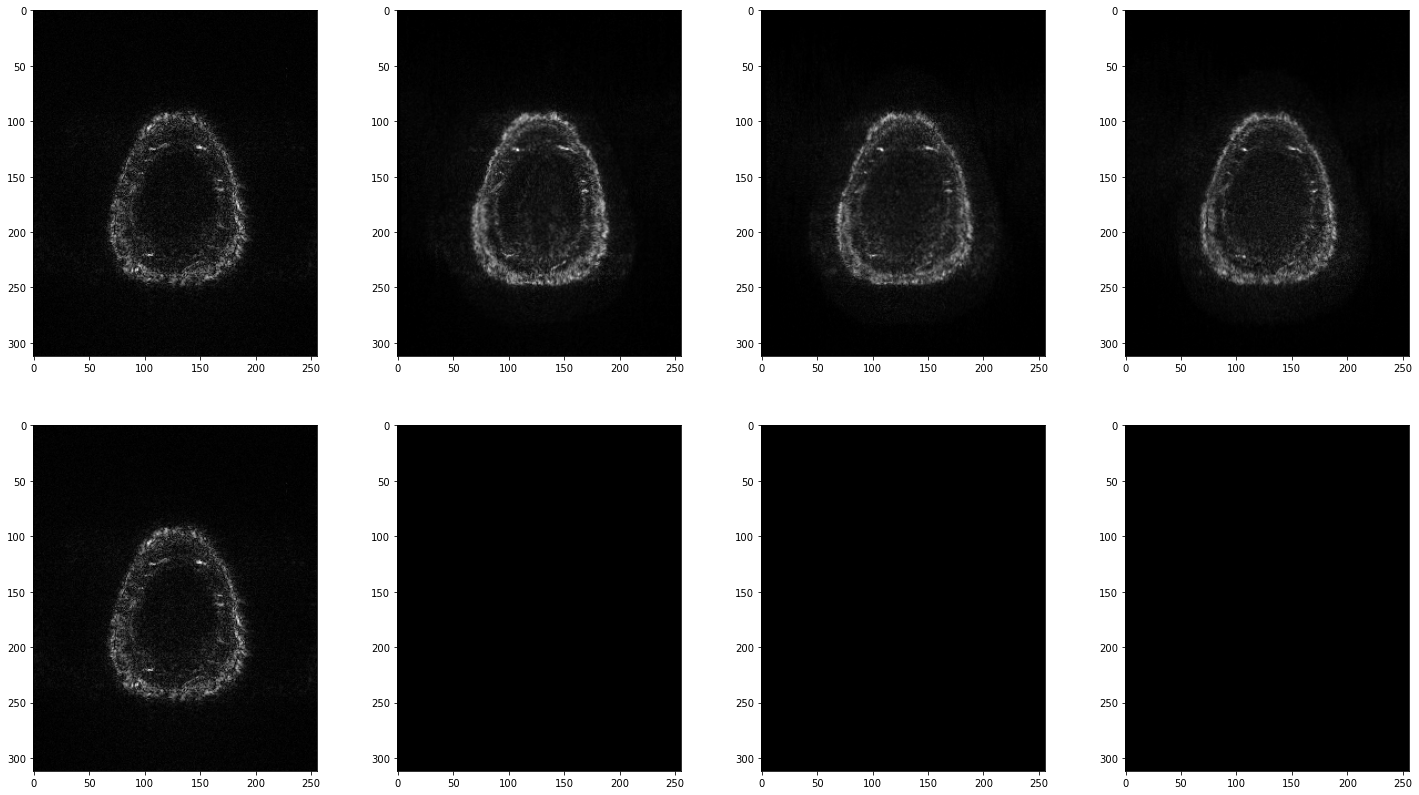

In [259]:
# epi, reg_caipi2, reg_caipi3, reg_caipi4, wm_mask, lesion_mask, vein_mask

subj_id = '1_01_018-V1'
slc_i = 50

epi = train_data[subj_id + '_3D_T2STAR_segEPI'][0][slc_i,:,:]

nifti_files = [
        nib.load(f'/home/quahb/caipi_denoising/data/source_niftis/{subj_id}/3D_EPI_1x2_Reg.nii.gz').get_fdata(),
        nib.load(f'/home/quahb/caipi_denoising/data/source_niftis/{subj_id}/3D_EPI_1x3_Reg.nii.gz').get_fdata(),
        nib.load(f'/home/quahb/caipi_denoising/data/source_niftis/{subj_id}/3D_EPI_2x2_Reg.nii.gz').get_fdata(),
        nib.load(f'/home/quahb/caipi_denoising/data/source_niftis/{subj_id}/3D_T1_Reg_pve_2.nii.gz').get_fdata(),
        np.array(nib.load(f'/home/quahb/caipi_denoising/data/source_niftis/{subj_id}/probability_map.nii.gz').get_fdata() > 0.6),
        #nib.load(f'/home/quahb/caipi_denoising/data/source_niftis/{subj_id}/probability_map.nii.gz').get_fdata(),
        nib.load(f'/home/quahb/caipi_denoising/data/source_niftis/{subj_id}/vein_mask.nii.gz').get_fdata()
]

nifti_files = [np.swapaxes(f, 0, 1) for f in nifti_files]
nifti_files = [np.flip(f, axis=2) for f in nifti_files]
nifti_files = [f[slc_i, :, :] for f in nifti_files]

figure, axis = plt.subplots(2, 4, figsize=(25, 14))
axis[0, 0].imshow(epi, cmap='gray')
axis[0, 1].imshow(nifti_files[0], cmap='gray')
axis[0, 2].imshow(nifti_files[1], cmap='gray')
axis[0, 3].imshow(nifti_files[2], cmap='gray')

axis[1, 0].imshow(epi, cmap='gray')
axis[1, 1].imshow(np.array(nifti_files[3] > 0.9), cmap='gray')
axis[1, 2].imshow(nifti_files[4], cmap='gray')
axis[1, 3].imshow(nifti_files[5], cmap='gray')